<a href="https://colab.research.google.com/github/kanyaweeud/KKU_data_mining/blob/master/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Data

In [30]:
from sklearn.datasets import make_blobs

In [31]:
x, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [32]:
x.shape

(300, 2)

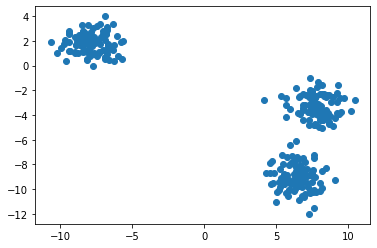

In [33]:
from matplotlib import pyplot as plt 
plt.scatter(x[:,0],x[:,1])

# Import

In [34]:
from sklearn.cluster import KMeans

# Define

In [35]:
KMclust = KMeans(n_clusters=5)

# Train

In [36]:
KMclust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Predict

In [37]:
label = KMclust.predict(x)

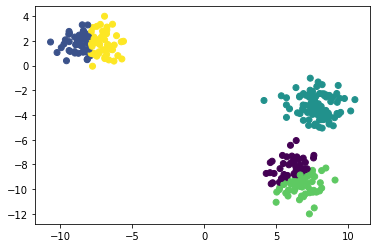

In [38]:
plt.scatter(x[:,0], x[:,1], c=label)

# Color quantization (application of kmea)

In [51]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_Material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import cv2
import os

In [53]:
img = cv2.imread(os.path.join(path,'655px-Mandrill_Albert_September_2015_Zoo_Berlin_(2).jpg'))

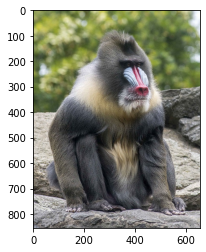

In [54]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Generate Data

In [57]:
RGB_img.shape

(855, 655, 3)

##count unique colors

In [58]:
import numpy as np

In [59]:
np.unique(RGB_img).shape

(256,)

##Use K-mean to reduce color from 256 color to 8 colors

In [64]:
#Difine
myQuantize = KMeans(n_clusters=8)

In [66]:
img_row = np.reshape(RGB_img,(855*655,3))
img_row

array([[134, 148,  87],
       [132, 146,  84],
       [134, 148,  86],
       ...,
       [169, 168, 173],
       [171, 170, 175],
       [132, 131, 137]], dtype=uint8)

In [67]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
#Predict
res = myQuantize.predict(img_row)
res

array([2, 2, 2, ..., 1, 1, 3], dtype=int32)

# Get cluster centers

In [72]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 31.45257879,  32.66217627,  34.15421269],
       [192.80076722, 189.66452096, 179.07874251],
       [142.91432489, 153.09242958,  80.77791509],
       [122.07135114, 119.82398434, 114.7000178 ],
       [ 65.88831724,  67.32832467,  61.1452916 ],
       [160.14076836, 158.47559001, 142.44359943],
       [ 95.47110897, 100.86901543,  75.1937283 ],
       [224.19797974, 221.35235018, 219.76560676]])

In [74]:
Clus_cen.shape

(8, 3)

# Map color name back to image

In [76]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [78]:
new_img_ = new_img/255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


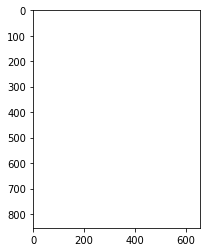

In [79]:
plt.imshow(new_img)